In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.contrib.keras import models
from tensorflow.contrib.keras import layers
from tensorflow.contrib.keras import losses,optimizers,metrics

import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')


/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
df = pd.read_csv('winequality_red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

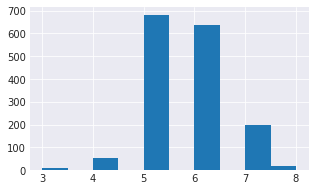

In [3]:
fig = plt.figure(figsize = (5,3))
plt.hist(df['quality'])

In [4]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [5]:
label_quality = LabelEncoder()

In [6]:
df['quality'] = label_quality.fit_transform(df['quality'])

In [7]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [8]:
feat_data = df.drop('quality',axis=1)
labels = df['quality']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(feat_data,
                                                    labels,
                                                    test_size=0.2,
                                                   random_state=42)

In [10]:
scaler = MinMaxScaler()

In [11]:
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [12]:
X_train.shape

(1279, 11)

# Create model and layers

In [13]:
# Model
dnn = models.Sequential()

In [14]:
# Layers
dnn.add(layers.Dense(units=11,input_dim=11, activation='relu'))
dnn.add(layers.Dense(units=11, activation='relu'))
dnn.add(layers.Dense(units=11, activation='relu'))
dnn.add(layers.Dense(units=2, activation='softmax'))

In [15]:
# Loss funciton
#losses.sparse_categorical_crossentropy

In [16]:
dnn.compile(optimizer='adam', 
            loss='sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [17]:
dnn.fit(scaled_x_train,y_train,epochs=50)

Epoch 1/50
1279/1279 [==============================] - 0s 229us/step - loss: 0.5557 - acc: 0.8679
Epoch 2/50
1279/1279 [==============================] - 0s 30us/step - loss: 0.4057 - acc: 0.8671
Epoch 3/50
1279/1279 [==============================] - 0s 33us/step - loss: 0.3550 - acc: 0.8671
Epoch 4/50
1279/1279 [==============================] - 0s 34us/step - loss: 0.3285 - acc: 0.8655
Epoch 5/50
1279/1279 [==============================] - 0s 34us/step - loss: 0.3118 - acc: 0.8671
Epoch 6/50
1279/1279 [==============================] - 0s 32us/step - loss: 0.3003 - acc: 0.8733
Epoch 7/50
1279/1279 [==============================] - 0s 29us/step - loss: 0.2946 - acc: 0.8749
Epoch 8/50
1279/1279 [==============================] - 0s 30us/step - loss: 0.2894 - acc: 0.8765
Epoch 9/50
1279/1279 [==============================] - 0s 29us/step - loss: 0.2877 - acc: 0.8772
Epoch 10/50
1279/1279 [==============================] - 0s 30us/step - loss: 0.2861 - acc: 0.8757
Epoch 11/50
1279/1

In [18]:
predictions = dnn.predict_classes(scaled_x_test)

In [19]:
print(classification_report(predictions,y_test))

             precision    recall  f1-score   support

          0       0.96      0.88      0.92       296
          1       0.26      0.50      0.34        24

avg / total       0.90      0.85      0.87       320

